In [1]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, gradient_boosting, RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df=pd.read_csv(r'C:\Users\Nikhil\Downloads\Project_Housing\Project_Housing_splitted\train.csv')

In [3]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [4]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
#Removing Columns which have high Null values
df.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], inplace=True)

In [7]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [8]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

Street
Pave    1164
Grvl       4
Name: Street, dtype: int64

LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

Utilities
AllPub    1168
Name: Utilities, dtype: int64

LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighb

In [9]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

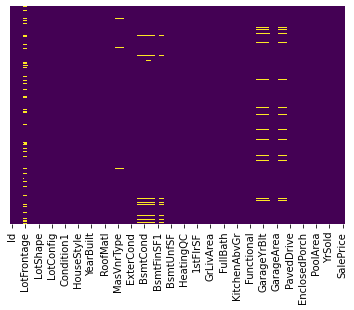

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
import dtale

In [12]:
dtale.show(df)

2021-06-06 21:06:53,089 - INFO     - NumExpr defaulting to 8 threads.


In [13]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

corr_data = df.corr(method='pearson')
corr_data.index.name = str('column')
corr_data = corr_data.reset_index()

In [14]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

from sklearn.impute import KNNImputer

output = KNNImputer(n_neighbors=2).fit_transform(df[['LotFrontage']])
df.loc[:, 'LotFrontage'] = pd.DataFrame(output, columns=['LotFrontage'], index=df.index)['LotFrontage']
from sklearn.impute import SimpleImputer

output = SimpleImputer().fit_transform(df[['LotFrontage']])
df.loc[:, 'LotFrontage'] = pd.DataFrame(output, columns=['LotFrontage'], index=df.index)['LotFrontage']
chart_data = pd.concat([
	df['Id'],
	df['MSSubClass'],
], axis=1)
chart_data = chart_data.sort_values(['Id'])
chart_data = chart_data.rename(columns={'Id': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

chart = go.Scattergl(
	x=chart_data['x'], y=chart_data['MSSubClass'], mode='markers', opacity=0.7, name='all',
	marker={'size': 15, 'line': {'width': 0.5, 'color': 'white'}}
)

figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'MSSubClass by Id'},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'Id'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'MSSubClass'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
# chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(chart)

In [15]:
figure

In [16]:
#Applying Simple Imputer 

# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

from sklearn.impute import KNNImputer

output = KNNImputer(n_neighbors=2).fit_transform(df[['LotFrontage']])
df.loc[:, 'LotFrontage'] = pd.DataFrame(output, columns=['LotFrontage'], index=df.index)['LotFrontage']
from sklearn.impute import SimpleImputer

output = SimpleImputer().fit_transform(df[['LotFrontage']])
df.loc[:, 'LotFrontage'] = pd.DataFrame(output, columns=['LotFrontage'], index=df.index)['LotFrontage']
s = df['MasVnrType']
s = s.replace({
	np.nan: np.nan})
df.loc[:, 'MasVnrType'] = s
# main statistics
stats = df['LotFrontage'].describe().to_frame().T
# sum
stats['sum'] = df['LotFrontage'].sum()
# median
stats['median'] = df['LotFrontage'].median()
# mode
mode = df['LotFrontage'].mode().values
stats['mode'] = np.nan if len(mode) > 1 else mode[0]
# var
stats['var'] = df['LotFrontage'].var()
# sem
stats['sem'] = df['LotFrontage'].sem()
uniq_vals = df['LotFrontage'].value_counts().sort_values(ascending=False)
uniq_vals.index.name = 'value'
uniq_vals.name = 'count'
uniq_vals = uniq_vals.reset_index()
uniq_vals.loc[:, 'type'] = 'float64'
sequential_diffs = df['LotFrontage'].diff()
min_diff = sequential_diffs.min()
max_diff = sequential_diffs.max()
avg_diff = sequential_diffs.mean()
diff_vals = sequential_diffs.value_counts().sort_values(ascending=False)

In [17]:
df=df.fillna(method='ffill')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [19]:
df['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [20]:
df['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
RRNn         1
Name: Condition2, dtype: int64

In [21]:
df['Id'].nunique()

1168

In [22]:
df=df.drop(['Id','Condition2','Utilities'],axis=1)

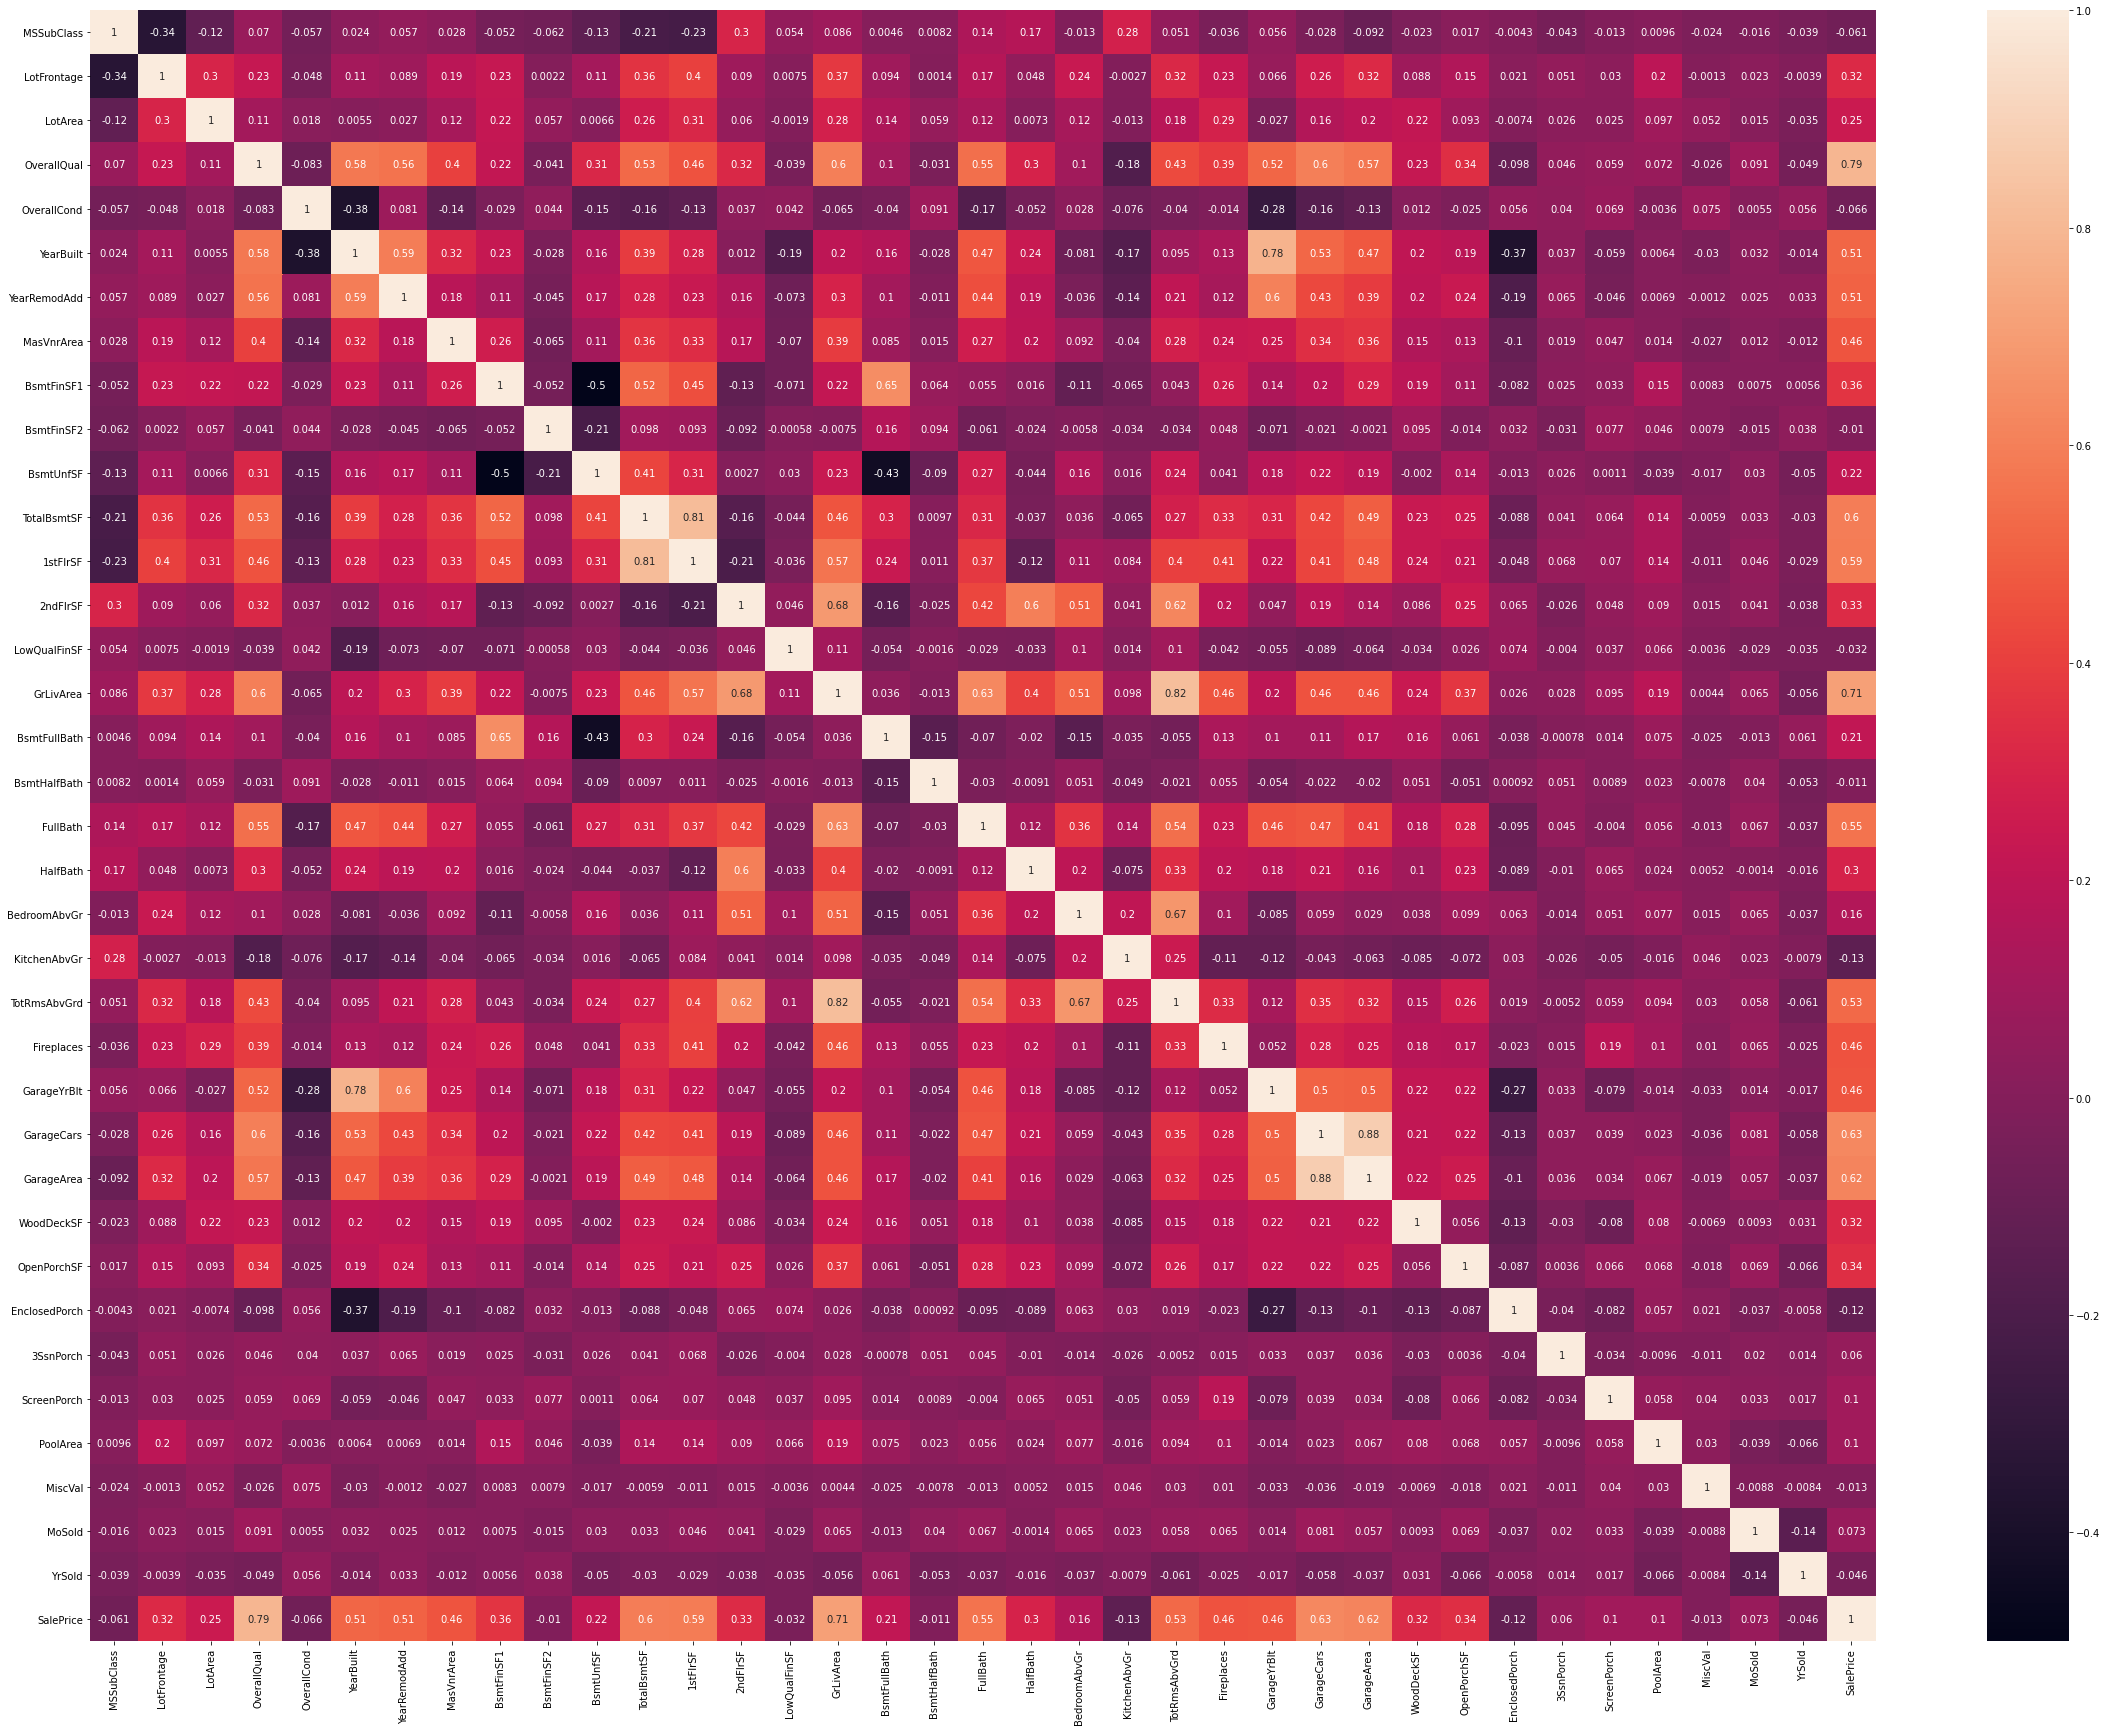

In [23]:
#Finding the correlation among all the variables 

plt.rcParams['figure.figsize']=(40,30)
sns.heatmap(df.corr(),annot=True)

In [24]:
#variables TotalBsmtSF and 1stFlrSF  are highly correlated with a correlation of 0.81 and 
#variables GrLivArea and TotRmsAbvGrd are highly correlated with a correlation of 0.82
#variables GarageArea and GarageCars are highly correlated with a correlation of 0.88


df=df.drop(['1stFlrSF','GrLivArea','GarageCars'],axis=1)

In [25]:
df=df.drop(['GarageYrBlt'],axis=1)

In [26]:
df.shape

(1168, 69)

In [27]:
df['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
ClyTile       1
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [28]:
def decompose_categorical(x):
    if x=='CompShg':
        return 'CompShg'
    elif x=='Tar&Grv':
        return 'Tar&Grv'
    elif x=='WdShngl':
        return 'WdShngl'
    elif x=='WdShake':
        return 'WdShake'
    else:
        return 'Others'
    
df['RoofMatl']=df['RoofMatl'].apply(decompose_categorical)
df['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Others        4
Name: RoofMatl, dtype: int64

In [29]:
#Feature Mapping 
df['ExterQual'] = df['ExterQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
df['ExterCond'] = df['ExterCond'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
df['BsmtQual'] = df['BsmtQual'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))
df['BsmtCond'] = df['BsmtCond'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))
df['BsmtExposure'] = df['BsmtExposure'].replace(('Gd','Av','Mn','No','NA'),(4,3,2,1,0))
df['BsmtFinType1'] = df['BsmtFinType1'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'),(6,5,4,3,2,1,0))
df['BsmtFinType2'] = df['BsmtFinType2'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'),(6,5,4,3,2,1,0))
df['HeatingQC'] = df['HeatingQC'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
df['KitchenQual'] = df['KitchenQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
df['GarageQual'] = df['GarageQual'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))
df['GarageCond'] = df['GarageCond'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  BldgType       1168 non-null   object 
 12  HouseStyle     1168 non-null   object 
 13  OverallQual    1168 non-null   int64  
 14  OverallCond    1168 non-null   int64  
 15  YearBuilt      1168 non-null   int64  
 16  YearRemodAdd   1168 non-null   int64  
 17  RoofStyle      1168 non-null   object 
 18  RoofMatl

In [31]:
le=LabelEncoder()

In [32]:
df['Street']=le.fit_transform(df['Street'])

In [33]:
df['MSZoning']=le.fit_transform(df['MSZoning'])
df['LotShape']=le.fit_transform(df['LotShape'])
df['LandContour']=le.fit_transform(df['LandContour'])
df['LotConfig']=le.fit_transform(df['LotConfig'])
df['LandSlope']=le.fit_transform(df['LandSlope'])
df['Condition1']=le.fit_transform(df['Condition1'])
df['Neighborhood']=le.fit_transform(df['Neighborhood'])
df['BldgType']=le.fit_transform(df['BldgType'])
df['HouseStyle']=le.fit_transform(df['HouseStyle'])
df['RoofStyle']=le.fit_transform(df['RoofStyle'])
df['RoofMatl']=le.fit_transform(df['RoofMatl'])
df['Exterior1st']=le.fit_transform(df['Exterior1st'])
df['Exterior2nd']=le.fit_transform(df['Exterior2nd'])
df['MasVnrType']=le.fit_transform(df['MasVnrType'])
df['Foundation']=le.fit_transform(df['Foundation'])
df['Heating']=le.fit_transform(df['Heating'])
df['Electrical']=le.fit_transform(df['Electrical'])
df['Functional']=le.fit_transform(df['Functional'])
df['CentralAir']=le.fit_transform(df['CentralAir'])
df['GarageType']=le.fit_transform(df['GarageType'])
df['GarageFinish']=le.fit_transform(df['GarageFinish'])
df['PavedDrive']=le.fit_transform(df['PavedDrive'])
df['SaleType']=le.fit_transform(df['SaleType'])
df['SaleCondition']=le.fit_transform(df['SaleCondition'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201D2DC69D0>,
      dtype=object)

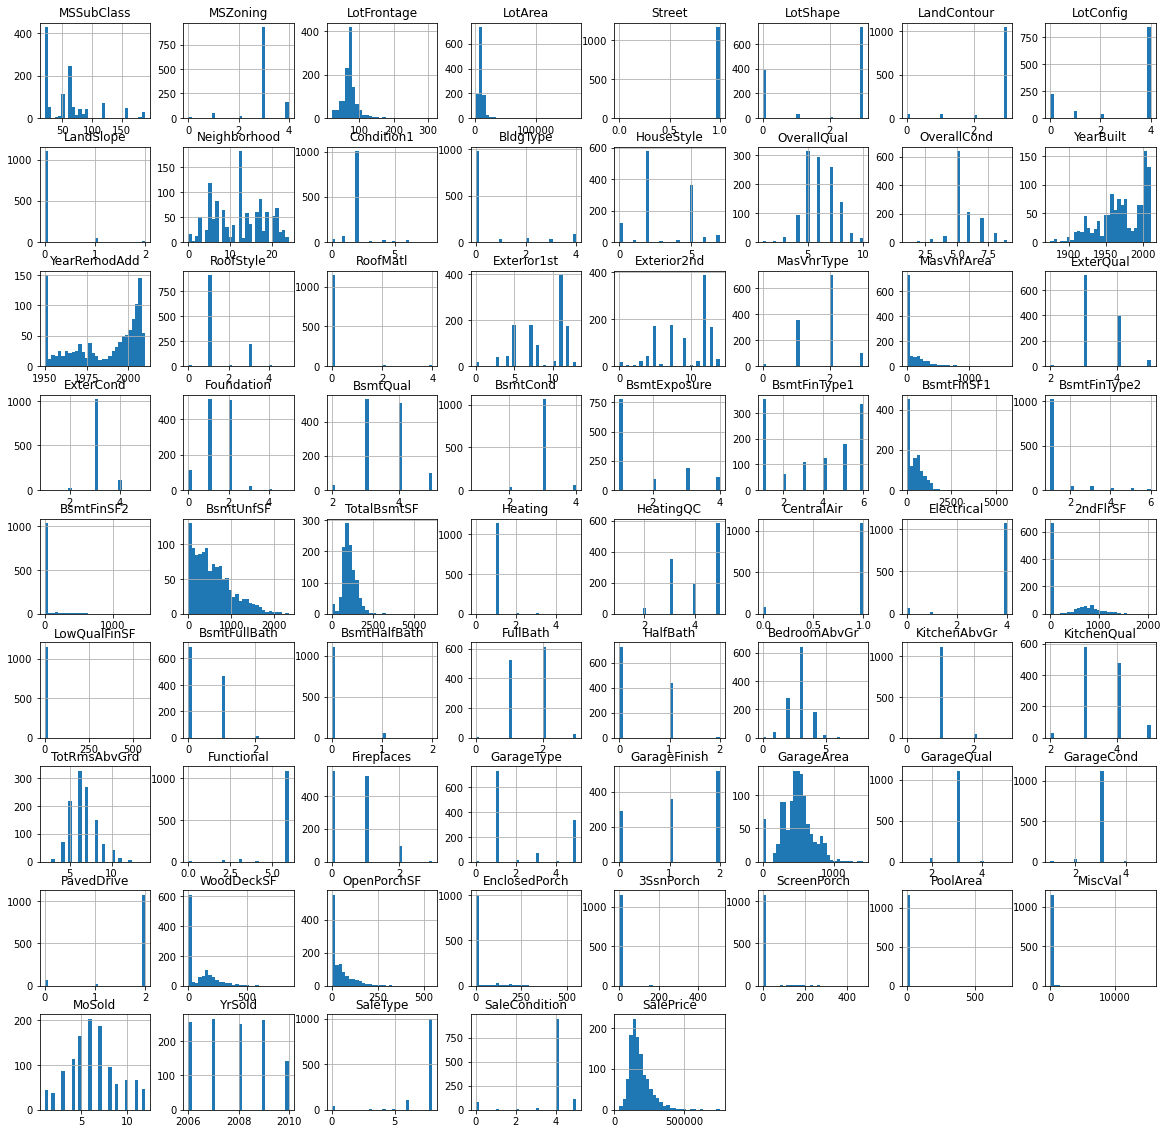

In [34]:
df.hist(figsize=(20,20), grid = True, bins = 30)

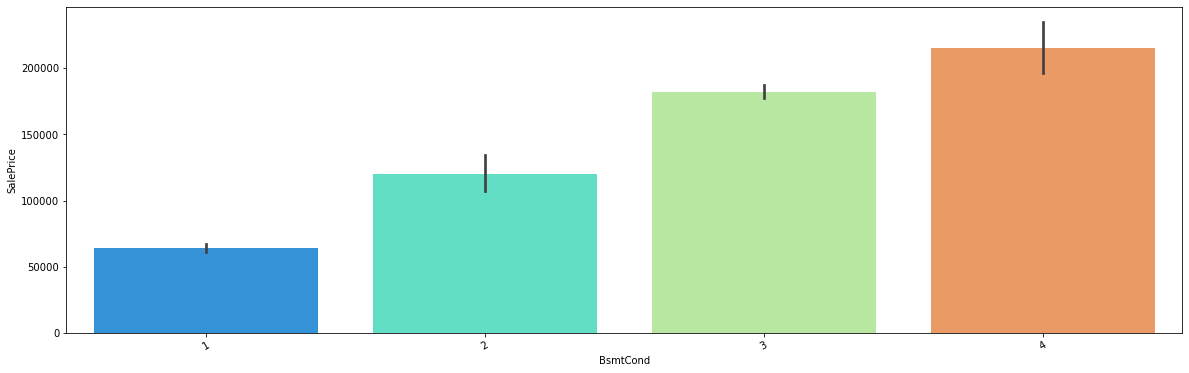

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(y='SalePrice',x='BsmtCond',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

[Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '4'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '9'),
 Text(0, 0, '1')]

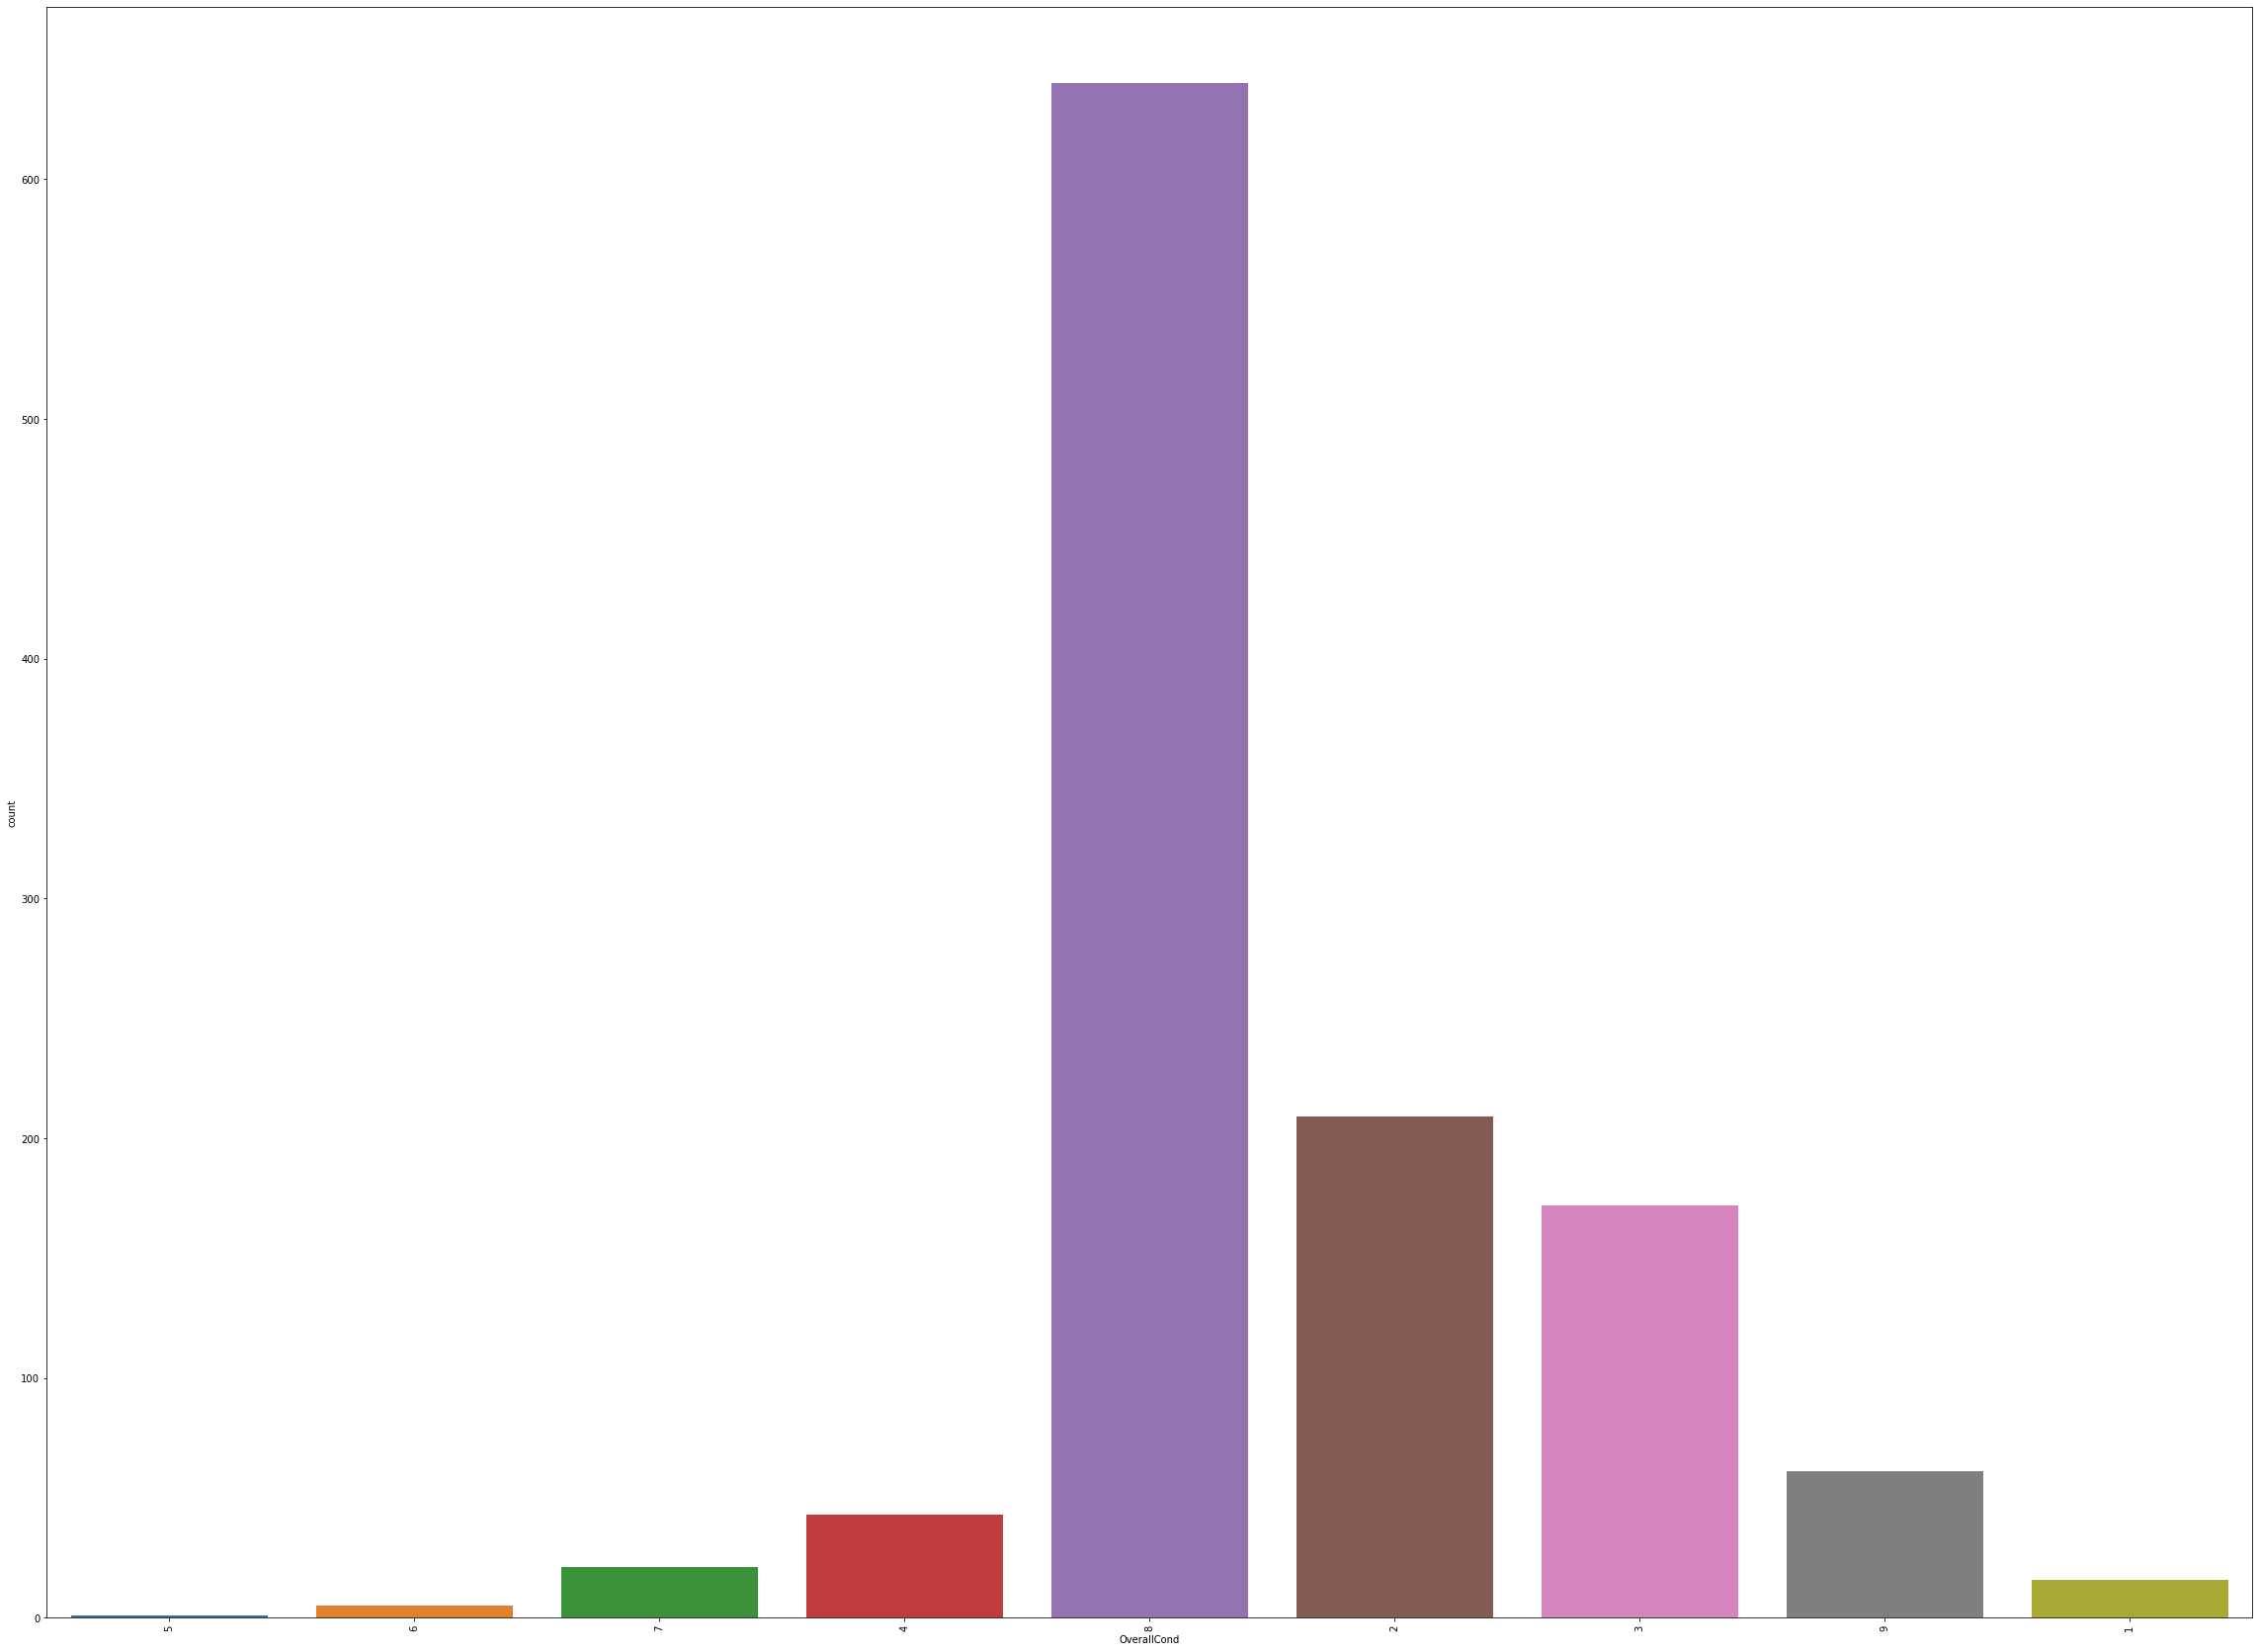

In [36]:
#plt.figure(figsize=(20,5))
l =list(df['OverallCond'].unique())
chart=sns.countplot(df['OverallCond'])
chart.set_xticklabels(labels=l,rotation=90)

In [37]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['Neighborhood'],
	df['SalePrice'],
], axis=1)
chart_data = chart_data.sort_values(['Neighborhood'])
chart_data = chart_data.rename(columns={'Neighborhood': 'x'})
chart_data = chart_data.dropna()



In [38]:
import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['SalePrice']))

In [39]:
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'SalePrice by Neighborhood'},
    'xaxis': {'title': {'text': 'Neighborhood'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'SalePrice'}, 'type': 'linear'}
}))

In [40]:
figure

In [41]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['HouseStyle'],
	df['SalePrice'],
], axis=1)
chart_data = chart_data.sort_values(['HouseStyle'])
chart_data = chart_data.rename(columns={'HouseStyle': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['SalePrice']))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'SalePrice by HouseStyle'},
    'xaxis': {'title': {'text': 'HouseStyle'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'SalePrice'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
# chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(chart)
figure

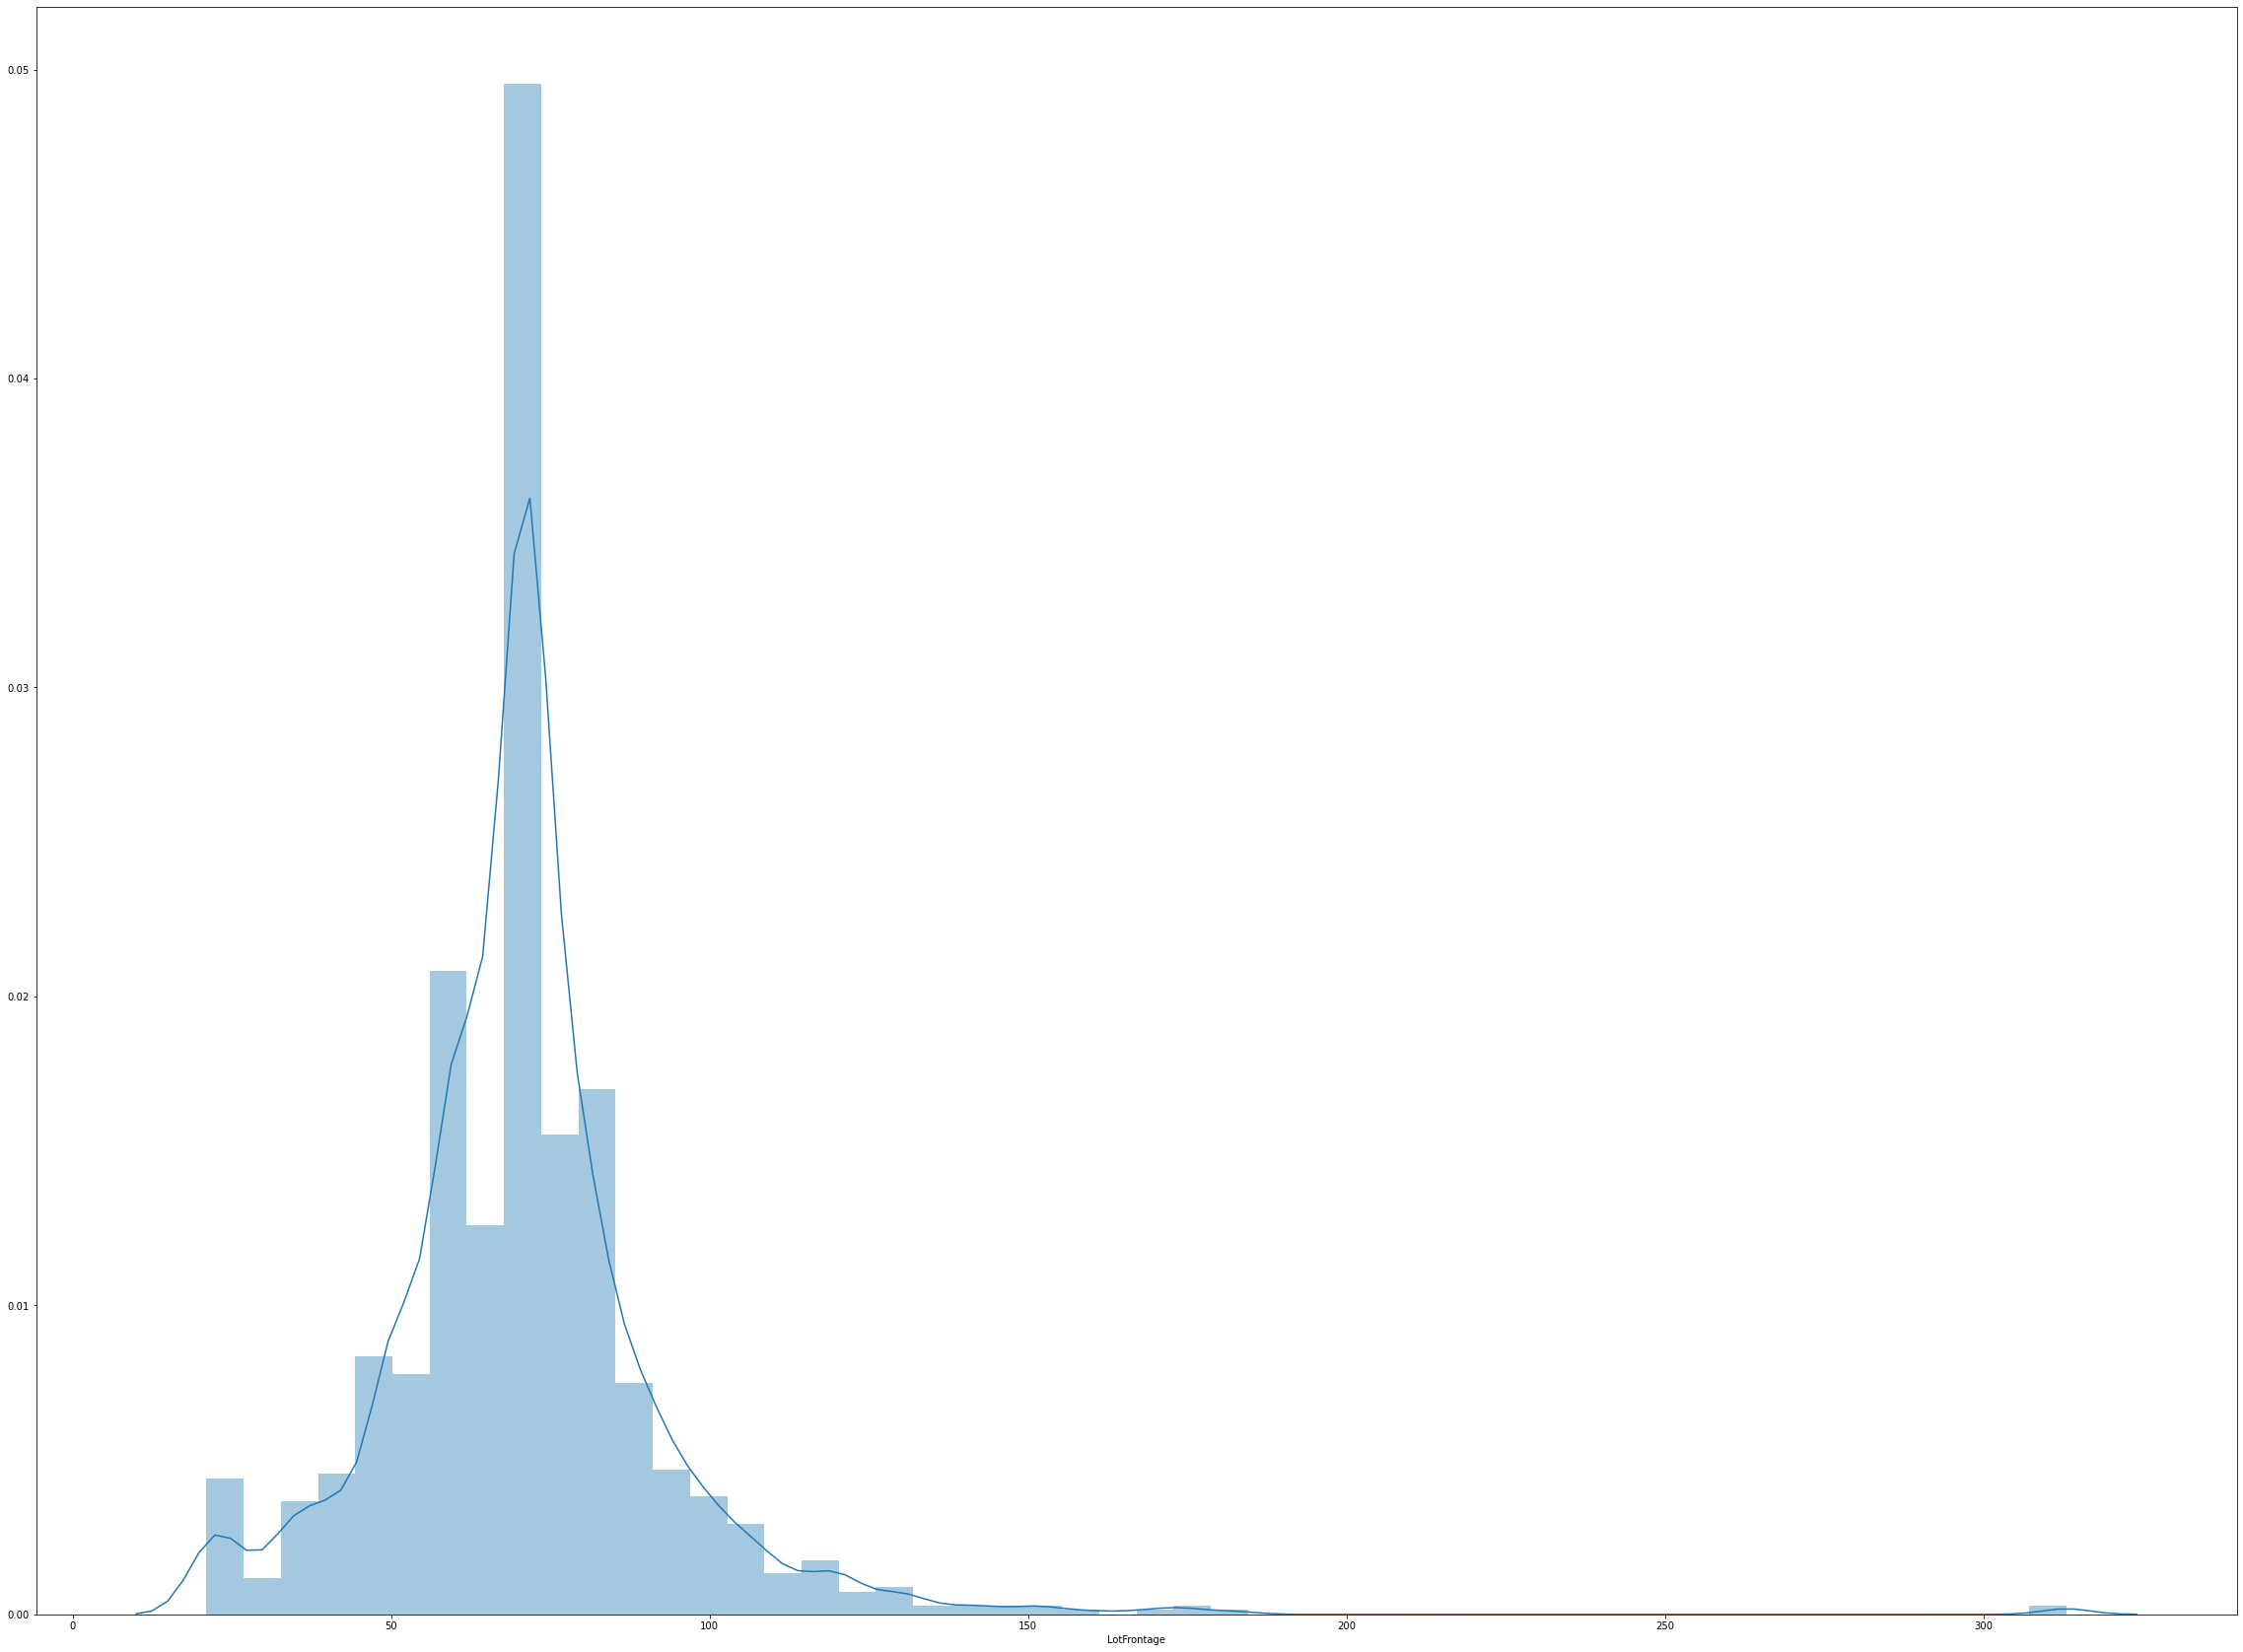

In [42]:
sns.distplot(df['LotFrontage'])

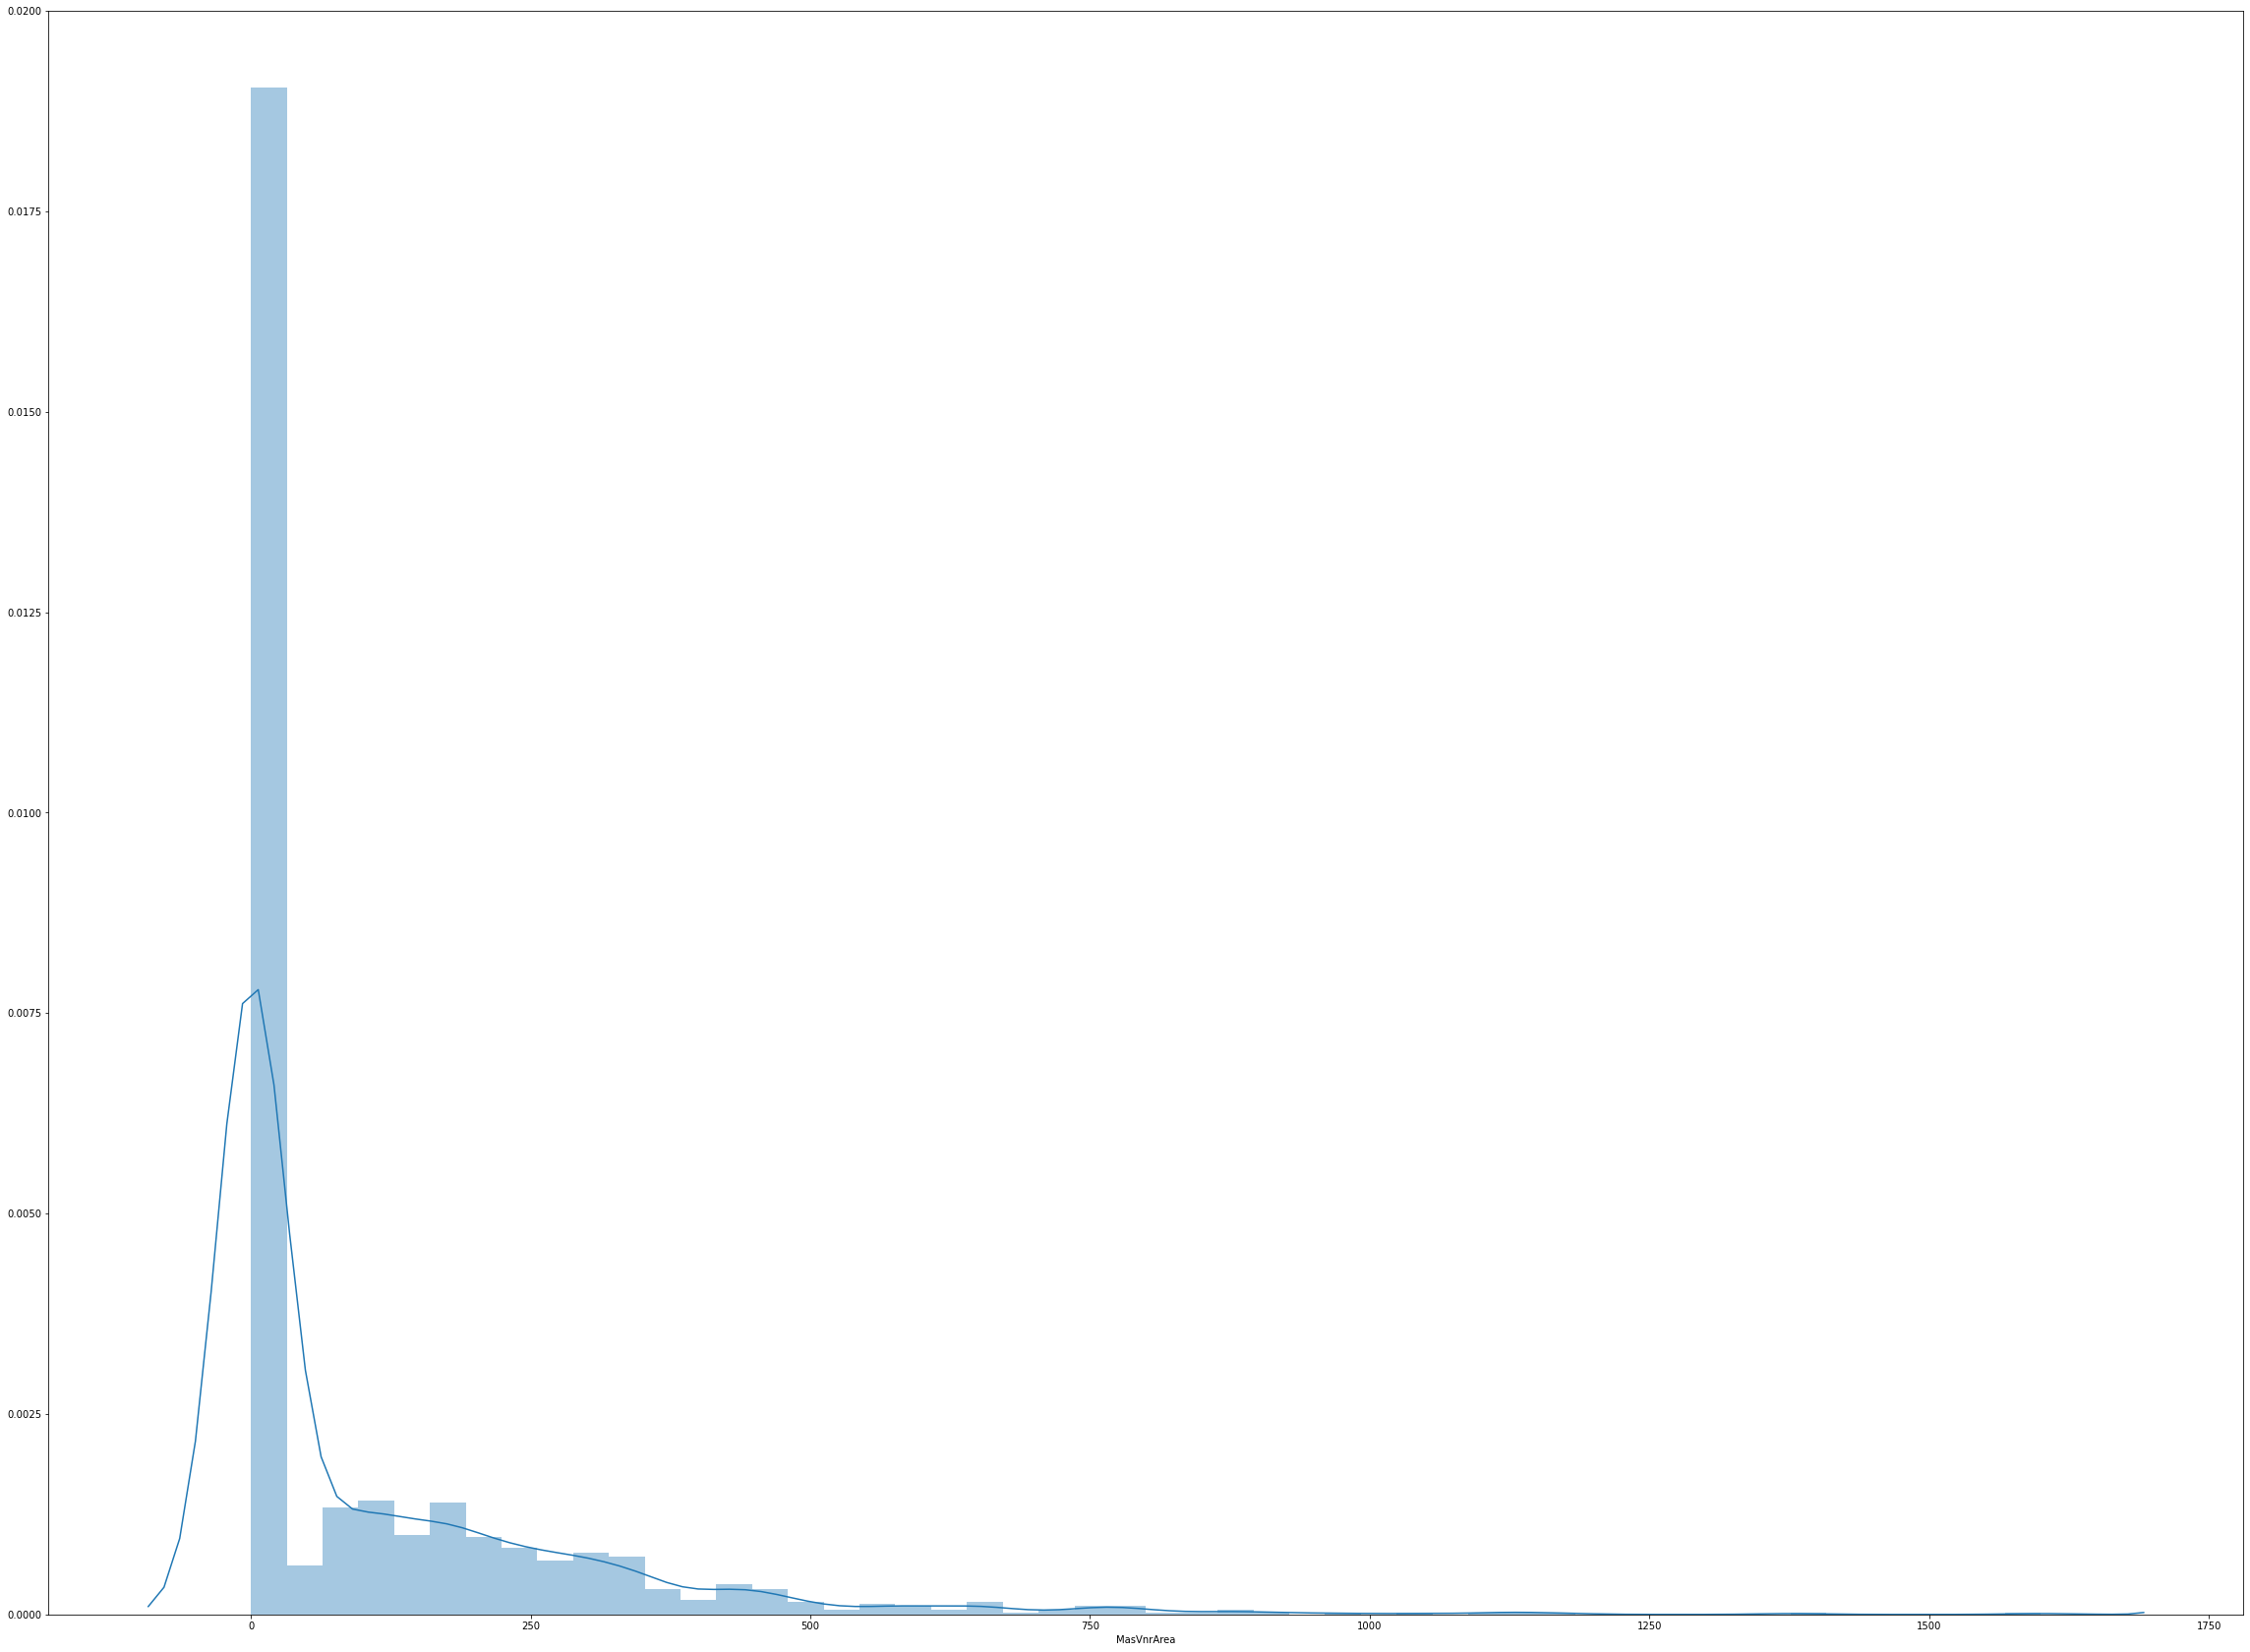

In [43]:
sns.distplot(df['MasVnrArea'])

In [44]:
df.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 69, dtype: float64

In [45]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [47]:
# support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(x_train),y_train)

SVR()

In [48]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = m.predict(scaler.transform(x_test))
score(y_pred,y_test)

0.9345954767770515

In [49]:
#importing error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.8354816453877891
MAE: 3.777681442291841e+18
MSE: 7.243550410497712e+37
RMSE: 8.510905010924345e+18
R2_score: -1.2376303748058435e+28
*************************************************************************


Score of SVR() is: -0.046419739607555854
MAE: 50641.32609100554
MSE: 5989144449.49037
RMSE: 77389.56292350002
R2_score: -0.023303030934493485
*************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 352335.5170940171
MSE: 136183439946.61966
RMSE: 369030.4051790579
R2_score: -22.26825275892614
*************************************************************************


Score of KNeighborsRegressor() is: 0.8008212051748529
MAE: 93734.56410256411
MSE: 11788230564.977777
RMSE: 108573.61818129566
R2_score: -1.0141327644089229
*************************************************************************


Score of Lasso() is: 0.8354845196003803
MAE: 33873792.86691594
MSE: 1465864120300565.2
RMS

# Feature Selection

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(x,y)

In [52]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [53]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [54]:
featureScores


Specs         Score
0      MSSubClass  1.639481e+04
1        MSZoning  9.598560e+01
2     LotFrontage  4.345087e+03
3         LotArea  5.746267e+06
4          Street  2.578465e+00
..            ...           ...
63        MiscVal  5.669726e+06
64         MoSold  6.376290e+02
65         YrSold  5.200845e-01
66       SaleType  1.781765e+02
67  SaleCondition  1.947536e+02

[68 rows x 2 columns]

In [55]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


           Specs         Score
3        LotArea  5.746267e+06
63       MiscVal  5.669726e+06
39      2ndFlrSF  3.837320e+05
32    BsmtFinSF2  3.407783e+05
30    BsmtFinSF1  3.338184e+05
62      PoolArea  3.241779e+05
22    MasVnrArea  2.458125e+05
33     BsmtUnfSF  2.402027e+05
40  LowQualFinSF  2.103716e+05
34   TotalBsmtSF  1.395232e+05


In [56]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [57]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01711088 0.01037513 0.0299631  0.03186483 0.00029504 0.01650361
 0.00772328 0.01748014 0.00455488 0.02570183 0.01026669 0.00766008
 0.0147208  0.02397251 0.01810228 0.03019527 0.03049933 0.01304572
 0.00153475 0.02152208 0.02136747 0.01646915 0.02112905 0.00971926
 0.00895783 0.0122303  0.01384506 0.00707275 0.01714318 0.02207505
 0.02812997 0.00843659 0.00806891 0.03171465 0.03170959 0.00135985
 0.01787137 0.00361728 0.0054497  0.01946197 0.00129745 0.01568685
 0.0041921  0.01171319 0.01276616 0.01958853 0.00253636 0.01379848
 0.02588597 0.00578714 0.01804612 0.01403002 0.01708166 0.03256165
 0.00327562 0.00281432 0.00507729 0.02496664 0.02513062 0.00921243
 0.00216242 0.00716917 0.000439   0.00310746 0.03195509 0.02865362
 0.00942105 0.01272238]


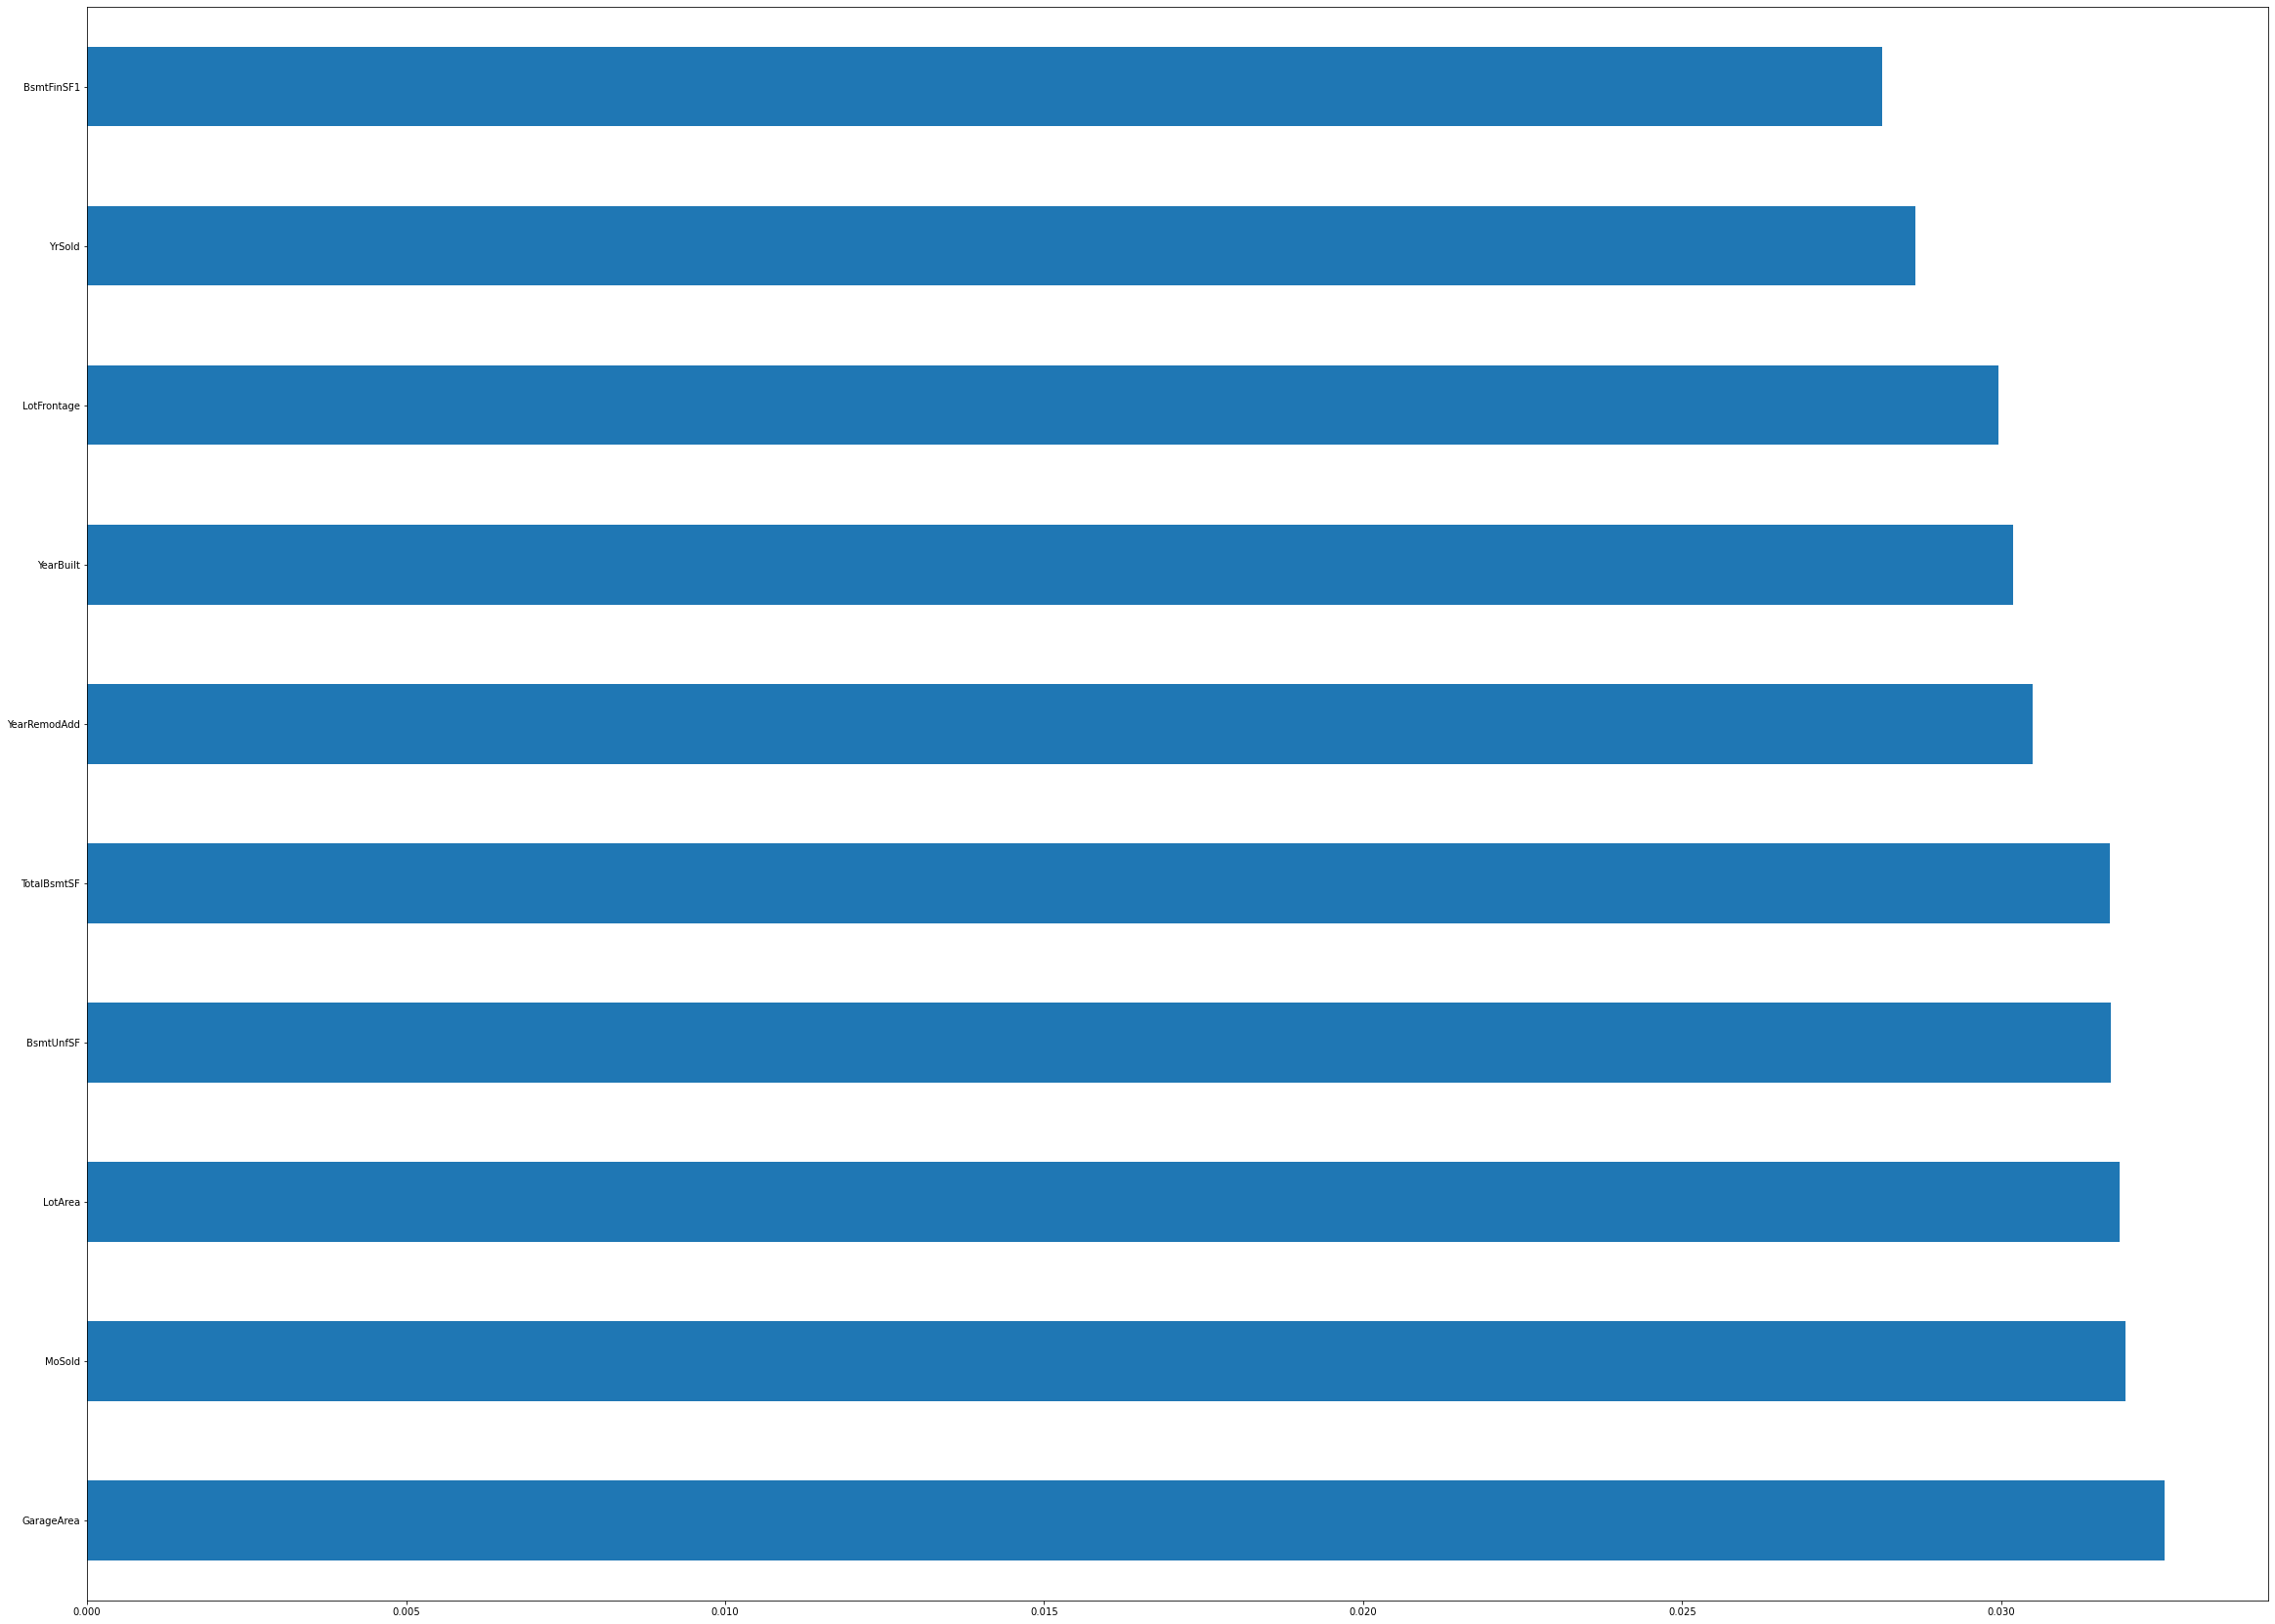

In [58]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Using Test Dataset

In [59]:
test_df=pd.read_csv(r'C:\Users\Nikhil\Downloads\Project_Housing\Project_Housing_splitted\test.csv')

In [60]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [62]:
#Removing Columns which have high Null values
test_df.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], inplace=True)

In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [64]:
test_df=test_df.fillna(method='ffill')

In [65]:
test_df=test_df.drop(['Id','Condition2','Utilities'],axis=1)

In [66]:
test_df=test_df.drop(['1stFlrSF','GrLivArea','GarageCars'],axis=1)

In [67]:
test_df=test_df.drop(['GarageYrBlt'],axis=1)

In [68]:
test_df.shape

(292, 68)

In [69]:
#Feature Mapping 
test_df['ExterQual'] = test_df['ExterQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
test_df['ExterCond'] = test_df['ExterCond'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
test_df['BsmtQual'] = test_df['BsmtQual'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))
test_df['BsmtCond'] = test_df['BsmtCond'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))
test_df['BsmtExposure'] = test_df['BsmtExposure'].replace(('Gd','Av','Mn','No','NA'),(4,3,2,1,0))
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'),(6,5,4,3,2,1,0))
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'),(6,5,4,3,2,1,0))
test_df['HeatingQC'] = test_df['HeatingQC'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
test_df['KitchenQual'] = test_df['KitchenQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
test_df['GarageQual'] = test_df['GarageQual'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))
test_df['GarageCond'] = test_df['GarageCond'].replace(('Ex','Gd','TA','Fa','Po','NA'),(5,4,3,2,1,0))


In [70]:
test_df['Street']=le.fit_transform(test_df['Street'])
test_df['MSZoning']=le.fit_transform(test_df['MSZoning'])
test_df['LotShape']=le.fit_transform(test_df['LotShape'])
test_df['LandContour']=le.fit_transform(test_df['LandContour'])
test_df['LotConfig']=le.fit_transform(test_df['LotConfig'])
test_df['LandSlope']=le.fit_transform(test_df['LandSlope'])
test_df['Condition1']=le.fit_transform(test_df['Condition1'])
test_df['Neighborhood']=le.fit_transform(test_df['Neighborhood'])
test_df['BldgType']=le.fit_transform(test_df['BldgType'])
test_df['HouseStyle']=le.fit_transform(test_df['HouseStyle'])
test_df['RoofStyle']=le.fit_transform(test_df['RoofStyle'])
test_df['RoofMatl']=le.fit_transform(test_df['RoofMatl'])
test_df['Exterior1st']=le.fit_transform(test_df['Exterior1st'])
test_df['Exterior2nd']=le.fit_transform(test_df['Exterior2nd'])
test_df['MasVnrType']=le.fit_transform(test_df['MasVnrType'])
test_df['Foundation']=le.fit_transform(test_df['Foundation'])
test_df['Heating']=le.fit_transform(test_df['Heating'])
test_df['Electrical']=le.fit_transform(test_df['Electrical'])
test_df['Functional']=le.fit_transform(test_df['Functional'])
test_df['CentralAir']=le.fit_transform(test_df['CentralAir'])
test_df['GarageType']=le.fit_transform(test_df['GarageType'])
test_df['GarageFinish']=le.fit_transform(test_df['GarageFinish'])
test_df['PavedDrive']=le.fit_transform(test_df['PavedDrive'])
test_df['SaleType']=le.fit_transform(test_df['SaleType'])
test_df['SaleCondition']=le.fit_transform(test_df['SaleCondition'])

In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    int32  
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    int32  
 5   LotShape       292 non-null    int32  
 6   LandContour    292 non-null    int32  
 7   LotConfig      292 non-null    int32  
 8   LandSlope      292 non-null    int32  
 9   Neighborhood   292 non-null    int32  
 10  Condition1     292 non-null    int32  
 11  BldgType       292 non-null    int32  
 12  HouseStyle     292 non-null    int32  
 13  OverallQual    292 non-null    int64  
 14  OverallCond    292 non-null    int64  
 15  YearBuilt      292 non-null    int64  
 16  YearRemodAdd   292 non-null    int64  
 17  RoofStyle      292 non-null    int32  
 18  RoofMatl  

In [72]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [73]:
pred = model.predict(test_df)

In [74]:
pred

array([337488.82524616, 212569.00715708, 254789.00994923, 138358.87946442,
       243867.27075115,  74325.28447267, 111773.15709788, 314335.74501449,
       240779.49537235, 174097.66918214,  59131.99067786, 151022.05500555,
       115858.53555668, 213392.60842918, 298232.05839534, 139417.93344415,
       105768.50572669, 119589.74638536, 203470.38575778, 221573.25826974,
       173332.56149625, 146978.05804996, 136210.2641059 ,  45643.41230912,
       105362.82087793, 118907.24157544, 172243.68211819, 140915.18086071,
       195782.3898705 ,  81199.52580991, 117620.70351712, 205268.189428  ,
       244409.30106399, 191720.17656923, 120299.44246578, 173902.85486589,
       206455.46845515, 117284.74903747, 155628.36294993, 143748.04332782,
       109040.05799792, 283418.76224015, 234401.42442984, 206136.79668291,
       138175.09382016, 148829.79594836, 120482.4191359 ,  80129.09270971,
       220366.69539134, 337896.89611459, 137655.71172614, 230401.51042821,
        88860.560595  ,  

In [76]:
df['HouseStyle'].value_counts()

2    578
5    361
0    121
7     47
6     32
1     12
4     10
3      7
Name: HouseStyle, dtype: int64

In [81]:
import joblib
joblib.dump(model,"housing_project.pkl")

['housing_project.pkl']

In [83]:
import numpy as np
a=np.array(y_test)
predicted=np.array(model.predict(x_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

original      predicted
0      131000  129964.525799
1      127000  138596.684591
2      127500  134259.384070
3      150000  160356.512431
4      236000  251823.453137
..        ...            ...
229    151500  119404.909374
230     88000  105993.931867
231    164000  232341.103161
232    157500  176507.638625
233    185000  193446.327963

[234 rows x 2 columns]

Text(0, 0.5, 'Predicted Y')

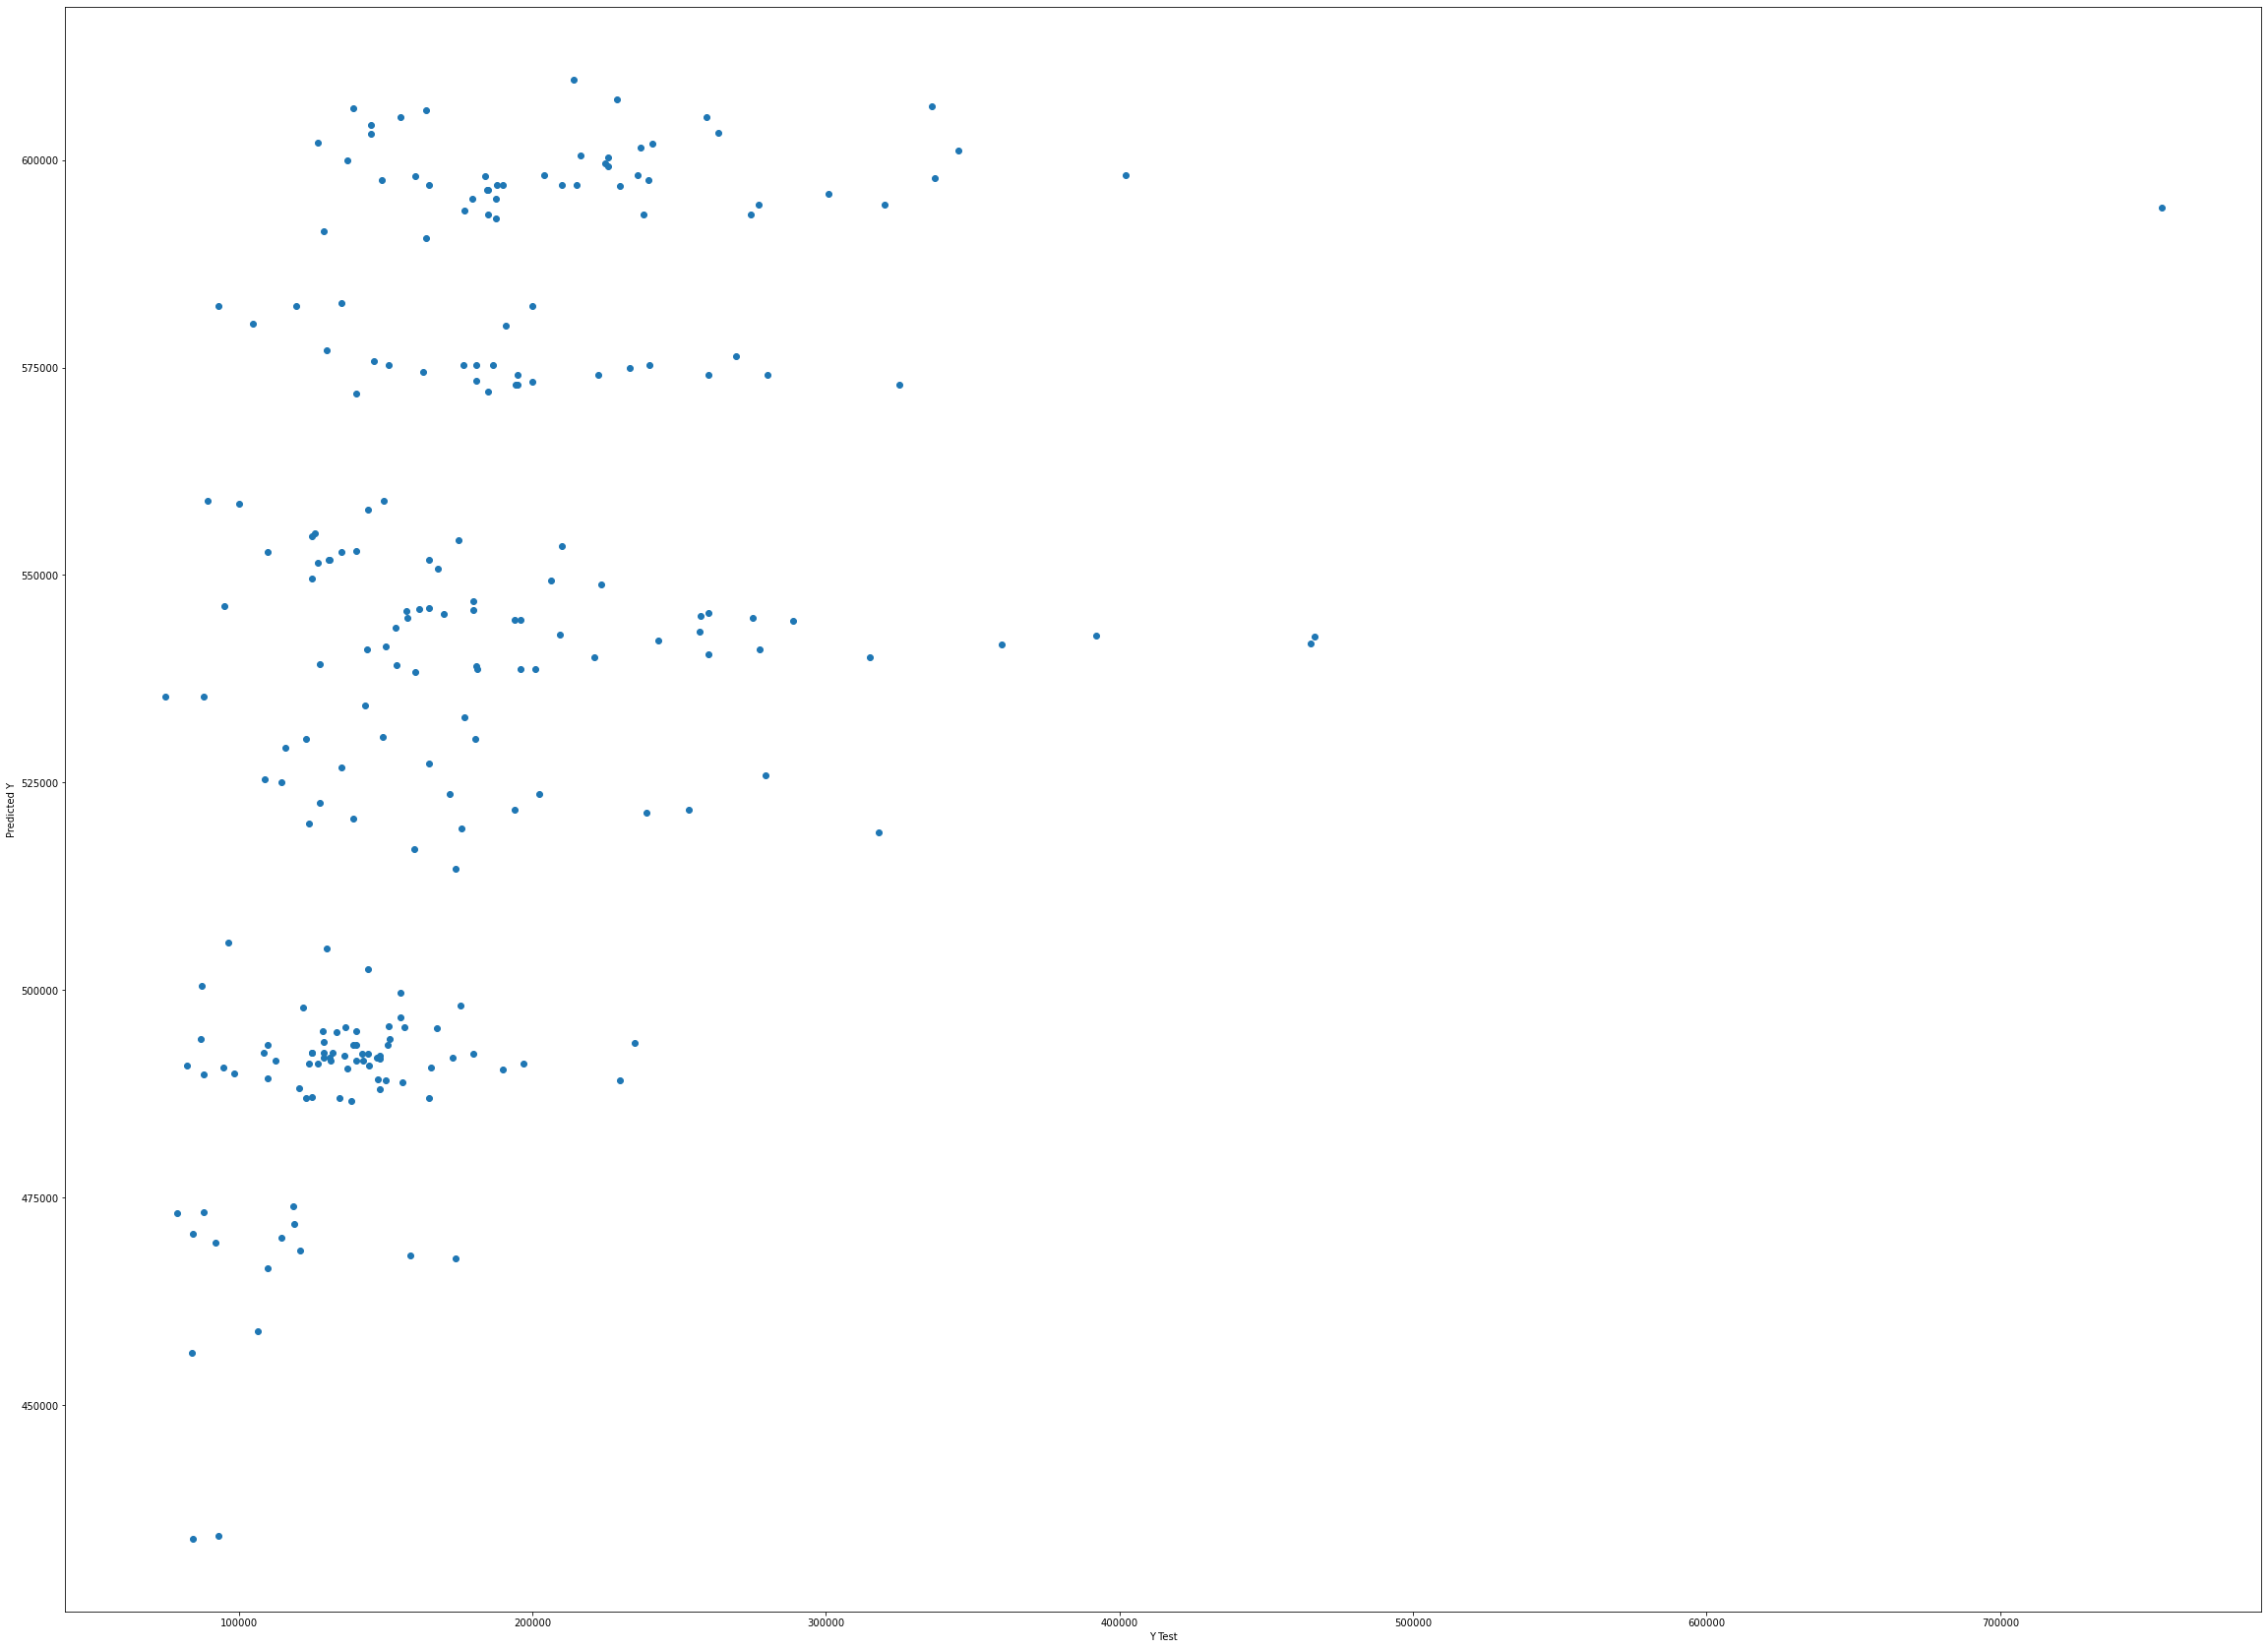

In [86]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Y Test           Pred
415   131000  129964.525799
580   127000  138596.684591
551   127500  134259.384070
98    150000  160356.512431
1112  236000  251823.453137

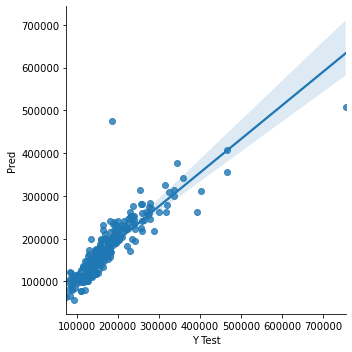

In [89]:
pred=model.predict(x_test)
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()